# Get a room: ML Hackathon
## Identify the habitability score of a property

### Problem Statement: You have given a relevant dataset about various properties in the USA. Your task is to identify the habitability score of the property.  Finding the correct property to live in is a crucial task while moving to a new city/location. An inappropriate property can make our life miserable. Can AI help us find better places?

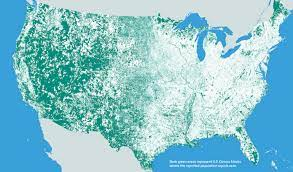

### Importing all the basic library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Importing the Dataset

In [3]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [4]:
#Display all the rows and columns upto 100 observation
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

### Data Insights & EDA

In [5]:
# Printing the shape of the train and test dataset

print(train.shape)
print('The shape of train data is: Row {} columns {}'.format(train.shape[0],train.shape[1]))

print('\n' , test.shape)
print('The shape of test data is: Row {} columns {}'.format(test.shape[0],test.shape[1]))

(39499, 15)
The shape of train data is: Row 39499 columns 15

 (10500, 14)
The shape of test data is: Row 10500 columns 14


In [6]:
train.head()

Property_ID Property_Type  Property_Area  Number_of_Windows  \
0      0x21e3     Apartment            106                NaN   
1      0x68d4     Apartment            733                2.0   
2      0x7d81     Apartment            737                4.0   
3      0x7a57     Apartment            900                3.0   
4      0x9409      Bungalow           2238               14.0   

   Number_of_Doors       Furnishing  Frequency_of_Powercuts Power_Backup  \
0                1   Semi_Furnished                     0.0           No   
1                2      Unfurnished                     1.0           No   
2                2  Fully Furnished                     0.0           No   
3                2      Unfurnished                     2.0          Yes   
4                6  Fully Furnished                     0.0           No   

              Water_Supply  Traffic_Density_Score              Crime_Rate  \
0  Once in a day - Morning                   5.89  Slightly below average   
1  Once in a day - Evening                   4.37      Well below average   
2  Once in a day - Morning                   7.45  Slightly below average   
3  Once in a day - Morning                   6.16      Well above average   
4                 All time                   5.46      Well below average   

  Dust_and_Noise  Air_Quality_Index  Neighborhood_Review  Habitability_score  
0         Medium               90.0                 3.86               71.98  
1         Medium               96.0                 3.55               71.20  
2         Medium              121.0                 3.81               71.39  
3         Medium              100.0                 1.34               31.46  
4         Medium              116.0                 4.77               93.70

In [7]:
test.head()

Property_ID   Property_Type  Property_Area  Number_of_Windows  \
0      0x6e93       Apartment            293                3.0   
1      0x8787       Apartment            586                4.0   
2      0x6c17  Container Home            305                1.0   
3      0x9dbd       Apartment            258                2.0   
4      0xbfde        Bungalow           3031               12.0   

   Number_of_Doors       Furnishing  Frequency_of_Powercuts Power_Backup  \
0                1      Unfurnished                     0.0           No   
1                1   Semi_Furnished                     0.0           No   
2                2   Semi_Furnished                     1.0           No   
3                1   Semi_Furnished                     1.0           No   
4                4  Fully Furnished                     0.0           No   

              Water_Supply  Traffic_Density_Score              Crime_Rate  \
0  Once in a day - Morning                   7.28      Well above average   
1  Once in a day - Evening                   7.63      Well below average   
2                 All time                   5.39  Slightly above average   
3                 All time                   7.53  Slightly below average   
4                 All time                   8.79      Well above average   

  Dust_and_Noise  Air_Quality_Index  Neighborhood_Review  
0         Medium              152.0                 2.52  
1         Medium               92.0                 4.16  
2         Medium               90.0                 2.92  
3         Medium              158.0                 3.45  
4           High              186.0                 2.72

In [8]:
#View summary of dataset

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39499 entries, 0 to 39498
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Property_ID             39499 non-null  object 
 1   Property_Type           39499 non-null  object 
 2   Property_Area           39499 non-null  int64  
 3   Number_of_Windows       37845 non-null  float64
 4   Number_of_Doors         39499 non-null  int64  
 5   Furnishing              38457 non-null  object 
 6   Frequency_of_Powercuts  38116 non-null  float64
 7   Power_Backup            39499 non-null  object 
 8   Water_Supply            39499 non-null  object 
 9   Traffic_Density_Score   39499 non-null  float64
 10  Crime_Rate              38712 non-null  object 
 11  Dust_and_Noise          38280 non-null  object 
 12  Air_Quality_Index       39499 non-null  float64
 13  Neighborhood_Review     39499 non-null  float64
 14  Habitability_score      39499 non-null

#### Comments:
- This info reflects that there are some null values. 
- And there are 7 Categorical feature and 8 numerical feature.

### Check for missing values in dataset

In [9]:
train.isnull().sum()/train.shape[0]*100

Property_ID               0.000000
Property_Type             0.000000
Property_Area             0.000000
Number_of_Windows         4.187448
Number_of_Doors           0.000000
Furnishing                2.638041
Frequency_of_Powercuts    3.501354
Power_Backup              0.000000
Water_Supply              0.000000
Traffic_Density_Score     0.000000
Crime_Rate                1.992456
Dust_and_Noise            3.086154
Air_Quality_Index         0.000000
Neighborhood_Review       0.000000
Habitability_score        0.000000
dtype: float64

#### Comments:
#### There are missing values in few columns so we will impute them with mean ( for numerical feature) and with mode ( for categorical feature).

### Handling the Missing Values

In [10]:
#Imputing Missing values using SimpleImputer

from sklearn.impute import SimpleImputer
si=SimpleImputer()
train[['Number_of_Windows','Frequency_of_Powercuts']]=si.fit_transform(train[['Number_of_Windows','Frequency_of_Powercuts']])
test[['Number_of_Windows','Frequency_of_Powercuts']]=si.transform(test[['Number_of_Windows','Frequency_of_Powercuts']])

In [11]:
si2=SimpleImputer(strategy='most_frequent')
train[['Furnishing','Crime_Rate','Dust_and_Noise']]=si2.fit_transform(train[['Furnishing','Crime_Rate','Dust_and_Noise']])
test[['Furnishing','Crime_Rate','Dust_and_Noise']]=si2.transform(test[['Furnishing','Crime_Rate','Dust_and_Noise']])

In [12]:
#Checking the null values after Imputation

train.isnull().sum()/train.shape[0]*100

Property_ID               0.0
Property_Type             0.0
Property_Area             0.0
Number_of_Windows         0.0
Number_of_Doors           0.0
Furnishing                0.0
Frequency_of_Powercuts    0.0
Power_Backup              0.0
Water_Supply              0.0
Traffic_Density_Score     0.0
Crime_Rate                0.0
Dust_and_Noise            0.0
Air_Quality_Index         0.0
Neighborhood_Review       0.0
Habitability_score        0.0
dtype: float64

In [13]:
train.duplicated().sum()

0

#### Comments:
- No Duplicate values found.

In [14]:
#View the statistical summary of numerical variables

train.describe()

Property_Area  Number_of_Windows  Number_of_Doors  \
count   39499.000000       39499.000000     39499.000000   
mean     1391.715638           3.923768         2.331375   
std      1953.287544           2.634047         1.179964   
min       100.000000           0.000000         1.000000   
25%       494.000000           2.000000         1.000000   
50%       932.000000           3.923768         2.000000   
75%      1770.000000           5.000000         3.000000   
max     28064.000000          15.000000         6.000000   

       Frequency_of_Powercuts  Traffic_Density_Score  Air_Quality_Index  \
count            39499.000000           39499.000000       39499.000000   
mean                 0.484678               6.354772         121.352566   
std                  0.738921               1.219681          62.384669   
min                  0.000000               0.000000           0.000000   
25%                  0.000000               5.600000          95.000000   
50%                  0.000000               6.470000         113.000000   
75%                  1.000000               7.220000         140.000000   
max                  3.000000               9.910000        1044.000000   

       Neighborhood_Review  Habitability_score  
count         39499.000000        39499.000000  
mean              3.735945           73.482297  
std               0.796843           14.118753  
min               0.000000            7.280000  
25%               3.220000           69.660000  
50%               3.850000           75.760000  
75%               4.260000           82.260000  
max               5.000000          100.000000

In [15]:
#categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in DataSet:",categorical.shape[1])
print(categorical.columns)

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in DataSet:",numerical.shape[1])
print(numerical.columns)

Categorical Features in DataSet: 7
Index(['Property_ID', 'Property_Type', 'Furnishing', 'Power_Backup',
       'Water_Supply', 'Crime_Rate', 'Dust_and_Noise'],
      dtype='object')
Numerical Features in DataSet: 8
Index(['Property_Area', 'Number_of_Windows', 'Number_of_Doors',
       'Frequency_of_Powercuts', 'Traffic_Density_Score', 'Air_Quality_Index',
       'Neighborhood_Review', 'Habitability_score'],
      dtype='object')


## Univariate Analysis

### - The numerical features

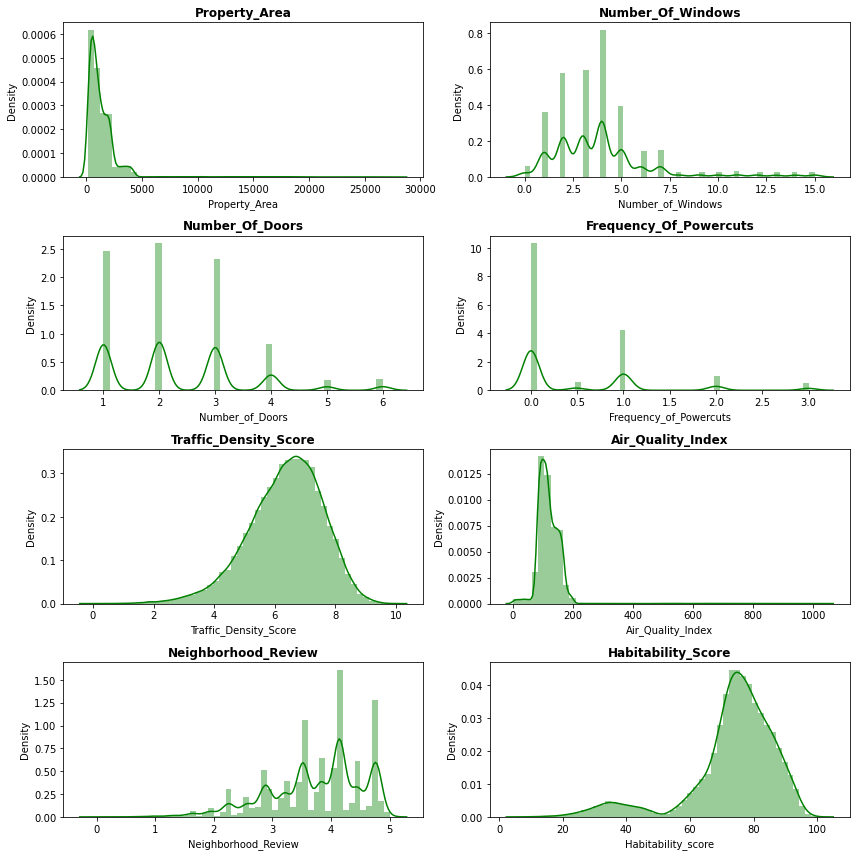

In [21]:
target = [i for i in numerical.columns]
plt.figure(figsize=(12,12))
for n,column in enumerate(target):
    plot=plt.subplot(4,2,n+1)
    sns.distplot(train[column],color='green')
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()


#### Comments:

- 'Number_of_Doors' is a discrete numerical feature.
- 'Number_of_Windows' can be mapped into different groups and can be converted to discrete values from the continous values.
- 'Frequency_of_Powercuts','Air_Quality_Index' can be grouped into categories (like poor,average,good).
- 'Traffic_Density_Score' seems to have fine distribution.
- 'Property_Area' needs more exploration.

### - The categorical features

In [22]:
categorical=categorical.drop('Property_ID',axis=1)

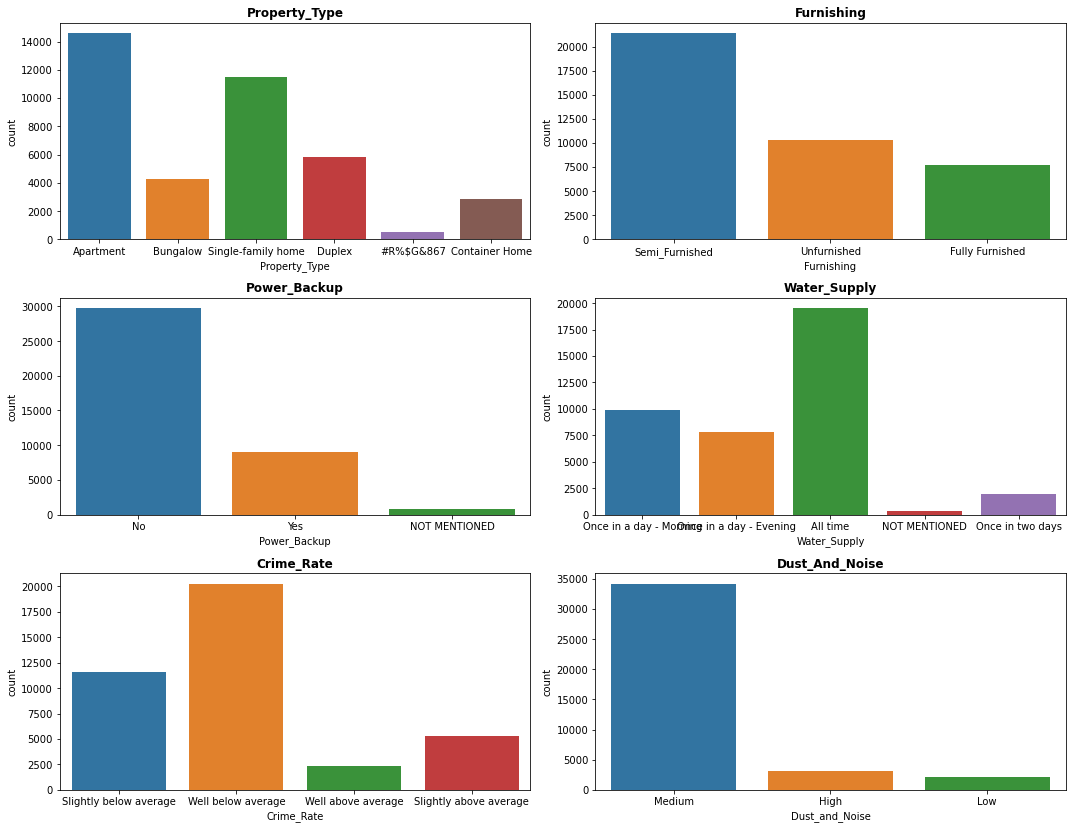

In [23]:
target = [i for i in categorical.columns]
plt.figure(figsize=(15,15))
for n,column in enumerate(target):
    plot=plt.subplot(4,2,n+1)
    sns.countplot(train[column])
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()

#### Comments:

- Each categorical data contains ordinal categorical data. so we have to encode them according to their order of importance.
- Few of the columns have not-mentioned values but as their ratio is small it won't create any problem.

### Multivariate Analysis

In [24]:
numerical.columns

Index(['Property_Area', 'Number_of_Windows', 'Number_of_Doors',
       'Frequency_of_Powercuts', 'Traffic_Density_Score', 'Air_Quality_Index',
       'Neighborhood_Review', 'Habitability_score'],
      dtype='object')

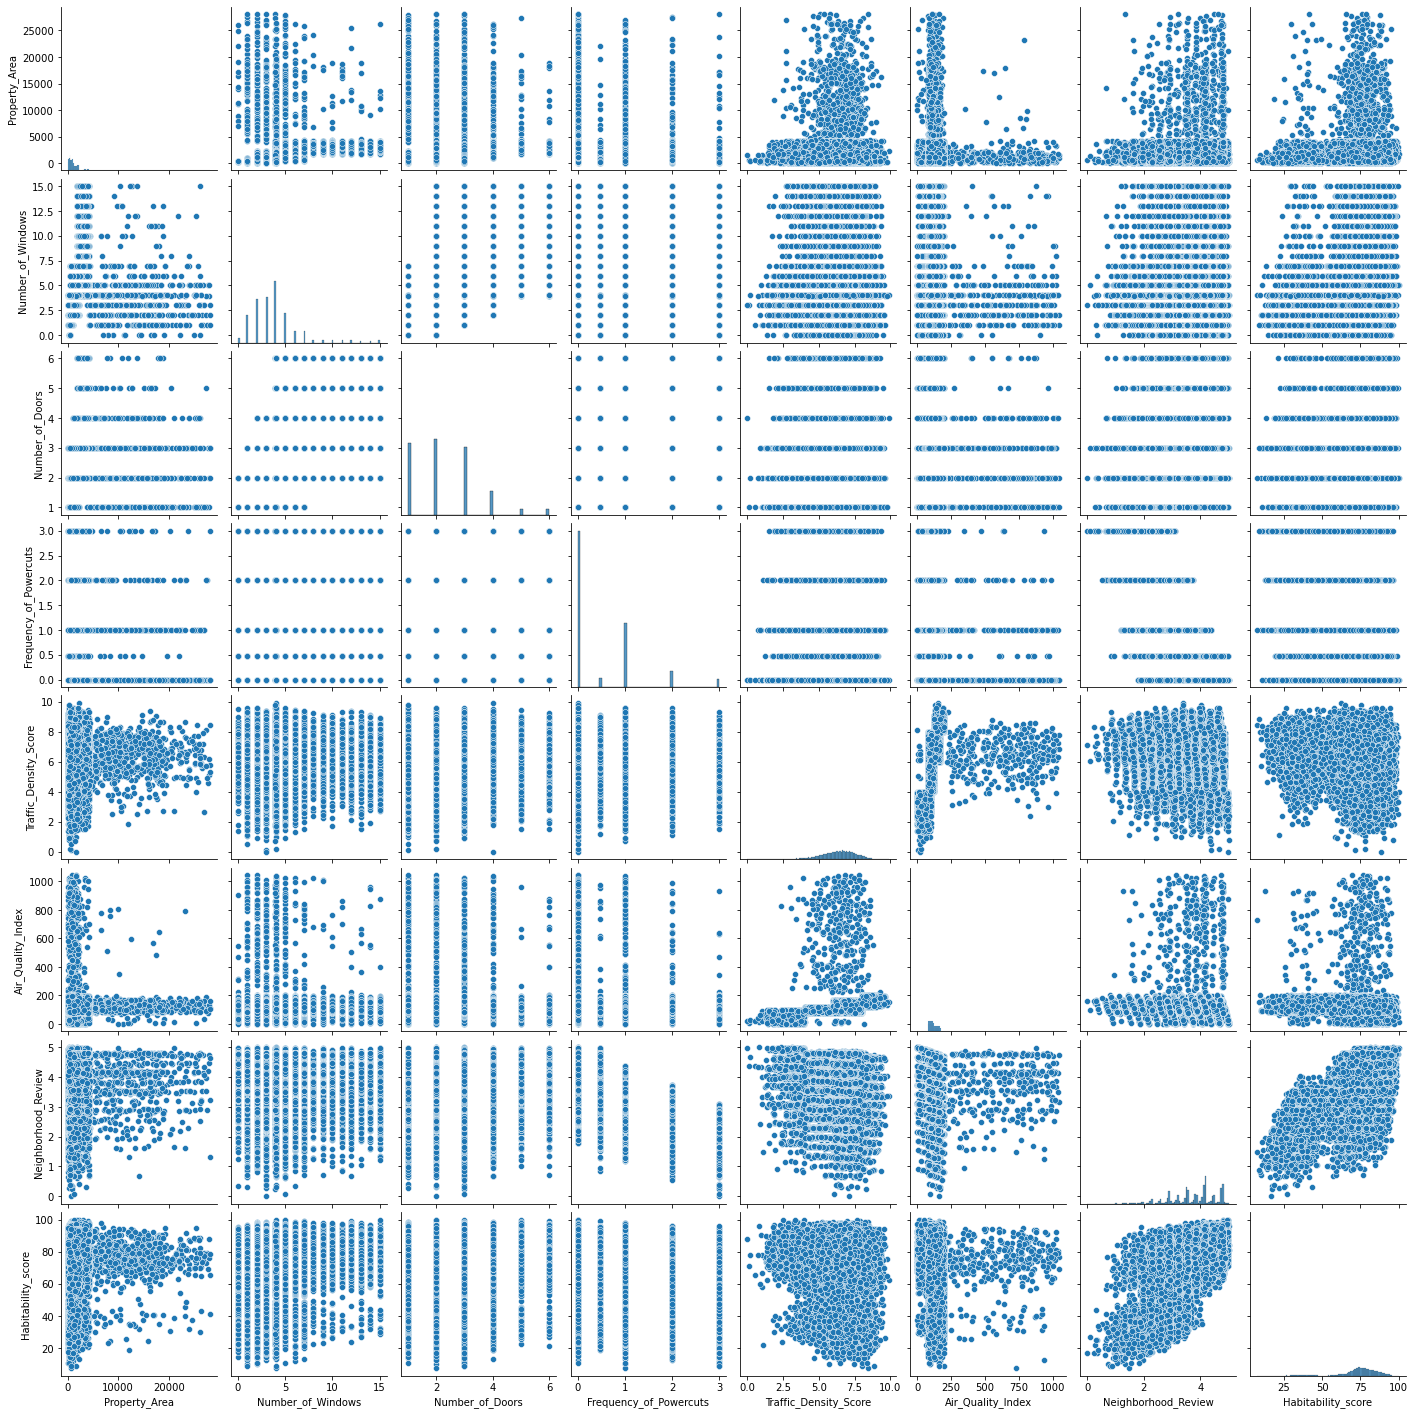

In [25]:
sns.pairplot(train)

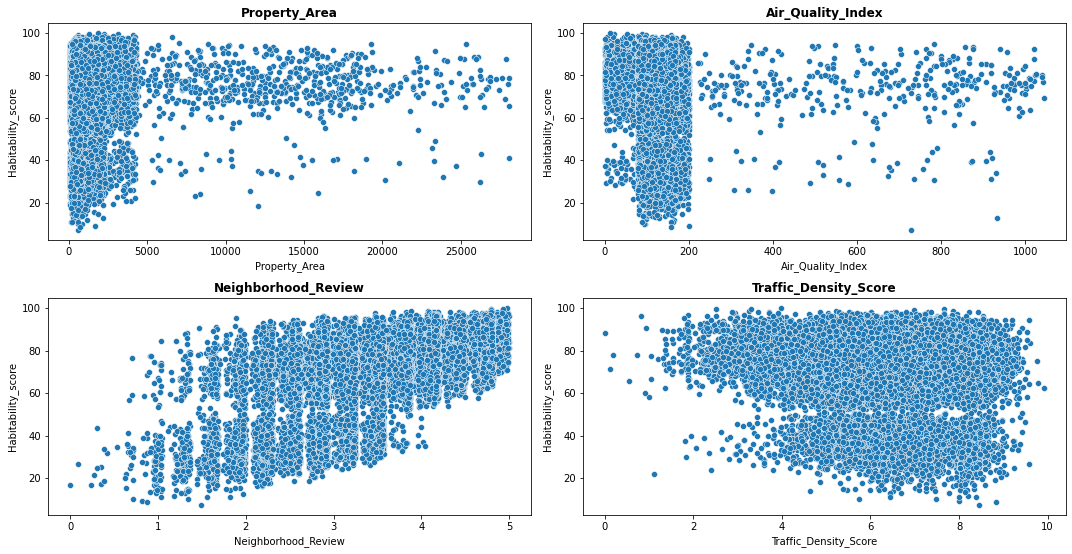

In [26]:
features=['Property_Area','Air_Quality_Index','Neighborhood_Review','Traffic_Density_Score']
plt.figure(figsize=(15,15))
for n,column in enumerate(features):
    plot=plt.subplot(4,2,n+1)
    sns.scatterplot(x=train[column],y=train['Habitability_score'])
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()


#### Comments:

- 'Neighborhood_Review' seems to be a very important feature.


<AxesSubplot:>

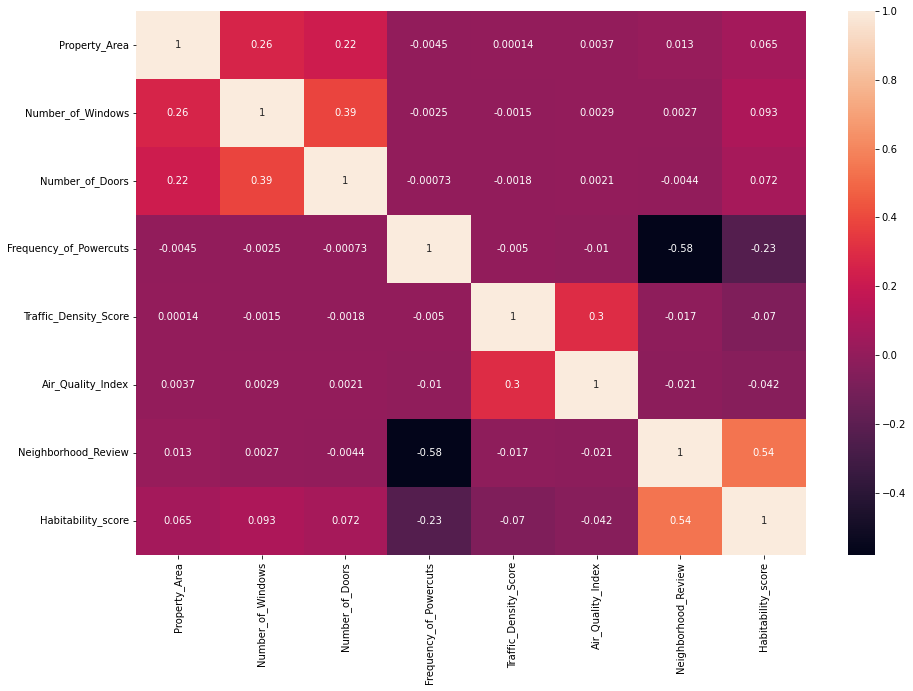

In [27]:
plt.figure(figsize=(15,10))

sns.heatmap(train.corr(),annot=True)

#### Comments:

- Every features are linearly independent as none of the features are highly correlated.

## Feature Engineering

### Mapping Of different Features

#### -Air_Quality_Index

In [28]:
train['Air_Quality_Index'].describe()

count    39499.000000
mean       121.352566
std         62.384669
min          0.000000
25%         95.000000
50%        113.000000
75%        140.000000
max       1044.000000
Name: Air_Quality_Index, dtype: float64

In [29]:
train['Air_Quality_Index'] = train['Air_Quality_Index'].apply(lambda x: 1 if x > 140 else(2 if x > 95  and x<=140  else 3))
test['Air_Quality_Index'] = test['Air_Quality_Index'].apply(lambda x: 1 if x > 140 else(2 if x > 95  and x<=140  else 3))

#### -Frequency_of_Powercuts

In [30]:
train['Frequency_of_Powercuts'].describe()

count    39499.000000
mean         0.484678
std          0.738921
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: Frequency_of_Powercuts, dtype: float64

In [31]:
train['Frequency_of_Powercuts']=train['Frequency_of_Powercuts'].apply(lambda x: 'Good' if x>=0 and x<1 else('Average' if x>=1 and x<2 else 'Poor'))
test['Frequency_of_Powercuts']=test['Frequency_of_Powercuts'].apply(lambda x: 'Good' if x>=0 and x<1 else('Average' if x>=1 and x<2 else 'Poor'))

In [ ]:
train['Frequency_of_Powercuts'].value_counts()

In [32]:
train['Frequency_of_Powercuts'].replace({'Poor':1, 'Average':2, 'Good':3}, inplace= True)
test['Frequency_of_Powercuts'].replace({'Poor':1, 'Average':2, 'Good':3}, inplace= True)

#### -Number_of_Windows

In [34]:
train['Number_of_Windows'].describe()

count    39499.000000
mean         3.923768
std          2.634047
min          0.000000
25%          2.000000
50%          3.923768
75%          5.000000
max         15.000000
Name: Number_of_Windows, dtype: float64

In [35]:
def convert_windows(number):
    if number < 5:
        return 1
    elif (number >=5) and (number < 10):
        return 2
    elif (number >=10) and (number < 15):
        return 3
    

In [36]:
train['Number_of_Windows']=train['Number_of_Windows'].apply(convert_windows)
test['Number_of_Windows']=test['Number_of_Windows'].apply(convert_windows)

In [37]:
train['Number_of_Windows']=train['Number_of_Windows'].fillna(0)

### Converting categorical variable into integers

#### - Nominal categorial features.

In [38]:
train['Property_Type'].value_counts()

Apartment             14596
Single-family home    11477
Duplex                 5806
Bungalow               4238
Container Home         2872
#R%$G&867               510
Name: Property_Type, dtype: int64

In [39]:
train=pd.get_dummies(train,columns=['Property_Type'],drop_first=True)
test=pd.get_dummies(test,columns=['Property_Type'],drop_first=True)

#### - Ordinal categorial features.

### Furnishing

In [40]:
train['Furnishing'].value_counts()

Semi_Furnished     21399
Unfurnished        10344
Fully Furnished     7756
Name: Furnishing, dtype: int64

In [41]:
train['Furnishing'].replace({'Unfurnished':1, 'Semi_Furnished':2, 'Fully Furnished':3}, inplace= True)
test['Furnishing'].replace({'Unfurnished':1, 'Semi_Furnished':2, 'Fully Furnished':3}, inplace= True)

### Power_Backup

In [42]:
train['Power_Backup'].value_counts()

No               29714
Yes               8957
NOT MENTIONED      828
Name: Power_Backup, dtype: int64

In [43]:
train['Power_Backup'].replace({'NOT MENTIONED':0, 'No':1, 'Yes':2}, inplace= True)
test['Power_Backup'].replace({'NOT MENTIONED':0, 'No':1, 'Yes':2}, inplace= True)

### Water_Supply

In [44]:
train['Water_Supply'].value_counts()

All time                   19511
Once in a day - Morning     9897
Once in a day - Evening     7815
Once in two days            1931
NOT MENTIONED                345
Name: Water_Supply, dtype: int64

In [45]:
train['Water_Supply'].replace({'All time':3, 'Once in a day - Morning':2, 'Once in a day - Evening':2,'Once in two days':1,'NOT MENTIONED':0}, inplace= True)
test['Water_Supply'].replace({'All time':3, 'Once in a day - Morning':2, 'Once in a day - Evening':2,'Once in two days':1,'NOT MENTIONED':0}, inplace= True)

### Crime_Rate

In [46]:
train['Crime_Rate'].value_counts()

Well below average        20259
Slightly below average    11580
Slightly above average     5303
Well above average         2357
Name: Crime_Rate, dtype: int64

In [47]:
train['Crime_Rate'].replace({'Well below average':4, 'Slightly below average':3, 'Slightly above average':2,'Well above average':1}, inplace= True)
test['Crime_Rate'].replace({'Well below average':4, 'Slightly below average':3, 'Slightly above average':2,'Well above average':1}, inplace= True)

### Dust_and_Noise

In [48]:
train['Dust_and_Noise'].value_counts()

Medium    34215
High       3212
Low        2072
Name: Dust_and_Noise, dtype: int64

In [49]:
train['Dust_and_Noise'].replace({'High':1, 'Medium':2, 'Low':3}, inplace= True)
test['Dust_and_Noise'].replace({'High':1, 'Medium':2, 'Low':3}, inplace= True)

#### Let's see the final data after all the required feature engineering

In [50]:
train.head()

Property_ID  Property_Area  Number_of_Windows  Number_of_Doors  Furnishing  \
0      0x21e3            106                1.0                1           2   
1      0x68d4            733                1.0                2           1   
2      0x7d81            737                1.0                2           3   
3      0x7a57            900                1.0                2           1   
4      0x9409           2238                3.0                6           3   

   Frequency_of_Powercuts  Power_Backup  Water_Supply  Traffic_Density_Score  \
0                       3             1             2                   5.89   
1                       2             1             2                   4.37   
2                       3             1             2                   7.45   
3                       1             2             2                   6.16   
4                       3             1             3                   5.46   

   Crime_Rate  Dust_and_Noise  Air_Quality_Index  Neighborhood_Review  \
0           3               2                  3                 3.86   
1           4               2                  2                 3.55   
2           3               2                  2                 3.81   
3           1               2                  2                 1.34   
4           4               2                  2                 4.77   

   Habitability_score  Property_Type_Apartment  Property_Type_Bungalow  \
0               71.98                        1                       0   
1               71.20                        1                       0   
2               71.39                        1                       0   
3               31.46                        1                       0   
4               93.70                        0                       1   

   Property_Type_Container Home  Property_Type_Duplex  \
0                             0                     0   
1                             0                     0   
2                             0                     0   
3                             0                     0   
4                             0                     0   

   Property_Type_Single-family home  
0                                 0  
1                                 0  
2                                 0  
3                                 0  
4                                 0

In [51]:
test.head()

Property_ID  Property_Area  Number_of_Windows  Number_of_Doors  Furnishing  \
0      0x6e93            293                1.0                1           1   
1      0x8787            586                1.0                1           2   
2      0x6c17            305                1.0                2           2   
3      0x9dbd            258                1.0                1           2   
4      0xbfde           3031                3.0                4           3   

   Frequency_of_Powercuts  Power_Backup  Water_Supply  Traffic_Density_Score  \
0                       3             1             2                   7.28   
1                       3             1             2                   7.63   
2                       2             1             3                   5.39   
3                       2             1             3                   7.53   
4                       3             1             3                   8.79   

   Crime_Rate  Dust_and_Noise  Air_Quality_Index  Neighborhood_Review  \
0           1               2                  1                 2.52   
1           4               2                  3                 4.16   
2           2               2                  3                 2.92   
3           3               2                  1                 3.45   
4           1               1                  1                 2.72   

   Property_Type_Apartment  Property_Type_Bungalow  \
0                        1                       0   
1                        1                       0   
2                        0                       0   
3                        1                       0   
4                        0                       1   

   Property_Type_Container Home  Property_Type_Duplex  \
0                             0                     0   
1                             0                     0   
2                             1                     0   
3                             0                     0   
4                             0                     0   

   Property_Type_Single-family home  
0                                 0  
1                                 0  
2                                 0  
3                                 0  
4                                 0

In [52]:
# Dropping Property_ID

Property_ID= test['Property_ID']
test=test.drop('Property_ID',axis=1)
train=train.drop('Property_ID',axis=1)

#### Dividing the dataset into X and y 

In [53]:
X=train.drop(columns=['Habitability_score'],axis=1)
y=train['Habitability_score']

#### Scaling using Standard-Scaler

In [54]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
test=scaler.transform(test)

## Bulding Different Models

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size = 0.15, random_state = 1)

### Importing different Regression Algorithm

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRFRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
import lightgbm

from sklearn.metrics import r2_score, mean_squared_error

## Linear Regression

In [58]:
lr=LinearRegression()

# Train Model
lr.fit(x_train,y_train)

# Training set performance
train_accuracy= lr.score(x_train,y_train)

#Testing set performance
test_accuracy=lr.score(x_test,y_test)


print('R2 Score for Training set is')
print( 100*train_accuracy)
print('----------------------------------')
print('R2 Score for Testing set is')
print( 100*test_accuracy)


R2 Score for Training set is
56.59319148120068
----------------------------------
R2 Score for Testing set is
56.56147129136647


## DecisionTreeRegressor

In [59]:
dt=DecisionTreeRegressor()

# Train Model
dt.fit(x_train,y_train)

# Training set performance
train_accuracy= dt.score(x_train,y_train)

#Testing set performance
test_accuracy=dt.score(x_test,y_test)


print('R2 Score for Training set is')
print( 100*train_accuracy)
print('----------------------------------')
print('R2 Score for Testing set is')
print( 100*test_accuracy)


R2 Score for Training set is
100.0
----------------------------------
R2 Score for Testing set is
67.30422994394549


## RandomForestRegressor

In [58]:
rf=RandomForestRegressor(n_estimators=1000,random_state=1,max_features=0.45,max_depth=10)

# Train Model
rf.fit(x_train,y_train)

# Training set performance
train_accuracy= rf.score(x_train,y_train)

#Testing set performance
test_accuracy=rf.score(x_test,y_test)


print('R2 Score for Training set is')
print( 100*train_accuracy)
print('----------------------------------')
print('R2 Score for Testing set is')
print( 100*test_accuracy)



R2 Score for Training set is
84.11720161315883
----------------------------------
R2 Score for Testing set is
81.57017959723366


## CatBoostRegressor

In [ ]:
ct= CatBoostRegressor()

# Train Model
ct.fit(x_train,y_train)

# Training set performance
train_accuracy= ct.score(x_train,y_train)

#Testing set performance
test_accuracy=ct.score(x_test,y_test)


print('R2 Score for Training set is')
print( 100*train_accuracy)
print('----------------------------------')
print('R2 Score for Testing set is')
print( 100*test_accuracy)



## XgBoost

In [45]:
xg=XGBRegressor(n_estimators=1000,learning_rate = 0.01, max_depth = 15,random_state=1)

# Train Model
xg.fit(x_train,y_train)

# Training set performance
train_accuracy= xg.score(x_train,y_train)

#Testing set performance
test_accuracy=xg.score(x_test,y_test)


print('R2 Score for Training set is')
print( 100*train_accuracy)
print('----------------------------------')
print('R2 Score for Testing set is')
print( 100*test_accuracy)

R2 Score for Training set is
96.40803903584974
----------------------------------
R2 Score for Testing set is
82.61570638755707


## HistGradientBoosting

In [59]:
hsb=HistGradientBoostingRegressor()

# Train Model
hsb.fit(x_train,y_train)

# Training set performance
train_accuracy= hsb.score(x_train,y_train)

#Testing set performance
test_accuracy=hsb.score(x_test,y_test)


print('R2 Score for Training set is')
print( 100*train_accuracy)
print('----------------------------------')
print('R2 Score for Testing set is')
print( 100*test_accuracy)

R2 Score for Training set is
82.97952567681006
----------------------------------
R2 Score for Testing set is
81.64186934115595


## Doing it together

In [53]:
regressors = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), 
              ExtraTreeRegressor(),HistGradientBoostingRegressor(),XGBRFRegressor(n_estimators=500, max_depth=12, eta=0.1, subsample=0.7, colsample_bytree=0.8),CatBoostRegressor(),AdaBoostRegressor(),XGBRegressor(),lightgbm.LGBMRegressor()]
names = ['Linear_Regression', 'DecisionTree', 'Random_Forest','ExtraTree', 'HistGradientBoosting','XGboostRF','catboost','adaboost','xgboost','LiGHtgbm']

In [ ]:
model_dict = {}
for name, reg in zip(names, regressors):
    
    # training
    reg.fit(x_train, y_train)
    
    # accuracy
    score = reg.score(x_test, y_test)
    model_dict[name] = [r2_score(y_test.values, reg.predict(x_test)), mean_squared_error(y_test.values, reg.predict(x_test)) ]

In [55]:
model_df = pd.DataFrame(model_dict, index = ['R2_score','mean_squared_error']).T
model_df= model_df.sort_values(by=['R2_score', 'mean_squared_error'], ascending=False)
model_df

R2_score  mean_squared_error
Random_Forest         0.822202           35.193061
catboost              0.819021           35.822635
HistGradientBoosting  0.815762           36.467822
LiGHtgbm              0.815628           36.494294
xgboost               0.812773           37.059411
XGboostRF             0.782058           43.138956
ExtraTree             0.677370           63.860869
DecisionTree          0.673028           64.720234
adaboost              0.593238           80.513832
Linear_Regression     0.565615           85.981456

## Stacking Regressor

In [50]:
from sklearn.ensemble import StackingRegressor


In [51]:
xg=XGBRegressor(random_state=1)
rf=RandomForestRegressor(random_state=1)
ct=CatBoostRegressor(random_state=1)
hsb=HistGradientBoostingRegressor(random_state=1)
lgbm=lightgbm.LGBMRegressor(random_state=1)

In [ ]:
estimator_list = [ 
    ('ct',ct),
    ('xg',xg),
    ('rmf',rf), ('lgbm',lgbm)]

stack_model = StackingRegressor(
    estimators=estimator_list,final_estimator=hsb
)

# Train stacked model
stack_model.fit(x_train, y_train)

In [53]:
stack_model.score(x_train,y_train)

0.9163527732013492

In [54]:
stack_model.score(x_test,y_test)

0.8397272639719697

In [55]:
y_pred=stack_model.predict(test)

## Submission

In [59]:
submission = pd.DataFrame()
submission['Property_ID'] = Property_ID
submission['Habitability_score'] = y_pred
submission.to_csv('Final.csv', index=None)

In [60]:
submission.shape

(10500, 2)

In [61]:
submission

Property_ID  Habitability_score
0          0x6e93           28.273403
1          0x8787           79.732591
2          0x6c17           66.063612
3          0x9dbd           75.510298
4          0xbfde           78.905846
...           ...                 ...
10495      0x423d           64.004588
10496      0x78c5           82.948036
10497       0xbf3           74.329530
10498      0x305b           80.243360
10499      0x5cff           80.821672

[10500 rows x 2 columns]